# Ispezione del dataset e controlli di qualità

Questo notebook è dedicato all’ispezione preliminare del dataset e ai controlli di qualità dei dati.
L’obiettivo è comprendere la struttura generale delle feature e delle variabili target, verificare l’assenza di anomalie (valori mancanti, duplicati o disallineamenti) e garantire la coerenza dei dati prima di procedere con l’analisi esplorativa statistica e la modellazione.

In [10]:
from statsmodels.graphics.tukeyplot import results
import pandas as pd
from src.dataset import load_dataset

### Caricamento del dataset
In questa sezione vengono caricati i dataset di training contenenti le feature operative (X) e le variabili target (y).
L’obiettivo è verificare che i dati siano accessibili e correttamente separati prima di procedere con qualsiasi analisi.


In [6]:
df_x_train= load_dataset("../../data/raw/train/X_train.csv")
df_y_train = load_dataset("../../data/raw/train/y_train.csv")

df_x_val= load_dataset("../../data/raw/val/X_validation.csv")
df_x_test= load_dataset("../../data/raw/test/X_test.csv")
print("Dimensioni dataset X:", df_x_train.shape)
print("Dimensioni dataset y:", df_y_train.shape)

Dimensioni dataset X: (742625, 8)
Dimensioni dataset y: (742625, 3)


### Struttura generale del dataset
Viene analizzata la struttura generale dei dataset osservando:
1) le prime righe;
2) i nomi delle colonne;
3) il tipo di variabili presenti.
Questo consente di comprendere il contenuto informativo delle feature e delle variabili target.

In [7]:
print("Colonne di X:")
print(df_x_train.columns.tolist())

print("\nColonne di y:")
print(df_y_train.columns.tolist())

display(df_x_train.head())
display(df_y_train.head())


Colonne di X:
['id', 'trq_measured', 'oat', 'mgt', 'pa', 'ias', 'np', 'ng']

Colonne di y:
['id', 'faulty', 'trq_margin']


,id,trq_measured,oat,mgt,pa,ias,np,ng
0,0,54.100,2.00000,544.5000,212.1408,74.56250,89.18000,99.6400
1,1,49.625,24.22231,578.4844,1625.6400,30.35596,99.55273,91.3866
2,2,52.000,7.00000,566.1000,1912.9250,65.62500,100.14000,90.9600
3,3,62.400,7.25000,560.1000,277.0632,54.81250,90.64000,100.2800
4,4,62.900,23.25000,593.7000,53.6448,73.43750,99.91000,92.1700


,id,faulty,trq_margin
0,0,1,-13.717745
1,1,0,1.791863
2,2,1,-13.944871
3,3,0,-0.017281
4,4,0,7.322404


### Tipologia delle variabili e informazioni generali
In questa fase si analizzano i tipi di dato, il numero di osservazioni e l’eventuale presenza di valori mancanti.
Questo controllo è fondamentale per prevenire errori nelle successive fasi di preprocessing.

In [8]:
print("Informazioni su X:")
df_x_train.info()

print("\nInformazioni su y:")
df_y_train.info()

Informazioni su X:
<class 'pandas.DataFrame'>
RangeIndex: 742625 entries, 0 to 742624
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            742625 non-null  int64  
 1   trq_measured  742625 non-null  float64
 2   oat           742625 non-null  float64
 3   mgt           742625 non-null  float64
 4   pa            742625 non-null  float64
 5   ias           742625 non-null  float64
 6   np            742625 non-null  float64
 7   ng            742625 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 45.3 MB

Informazioni su y:
<class 'pandas.DataFrame'>
RangeIndex: 742625 entries, 0 to 742624
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          742625 non-null  int64  
 1   faulty      742625 non-null  int64  
 2   trq_margin  742625 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 17.0 MB


#### Verifica della presenza di valori mancanti (NaN)
Si controlla la presenza di valori mancanti all’interno delle feature e delle variabili target.
I valori mancanti possono compromettere sia l’analisi esplorativa sia l’addestramento dei modelli, pertanto è necessario individuarli in questa fase preliminare.


In [24]:
dataset={

    "train":{"X":df_x_train,"y":df_y_train},
    "valid": {"X":df_x_val},
    "test":{"X":df_x_test}
}
results = []

for name, dataset in dataset.items():
    X = dataset["X"]
    nanX = dataset["X"].isna().sum().sum()

    if "y" in dataset:
        y = dataset["y"]
        nany = dataset["y"].isna().sum().sum()

    results.append({
        "dataset": name,
        "NaN_X_total": nanX,
        "NaN_y_total": nany
    })

duplicate = pd.DataFrame(results)
duplicate




,dataset,NaN_X_total,NaN_y_total
0,train,0,0
1,valid,0,0
2,test,0,0


#### Individuazione di osservazioni duplicate
In questa sezione si verifica la presenza di righe duplicate nei dataset.
Le osservazioni duplicate possono introdurre bias e alterare le analisi successive, pertanto è necessario individuarle ed eventualmente rimuoverle.

In [27]:
dataset={
    "train":{"X":df_x_train,"y":df_y_train},
    "valid": {"X":df_x_val},
    "test":{"X":df_x_test}
}

results = []

for name, dataset in dataset.items():
    X = dataset["X"]
    duplicateX = dataset["X"].duplicated().sum().sum()

    if "y" in dataset:
        y = dataset["y"]
        duplicateY = dataset["y"].duplicated().sum().sum()

    results.append({
        "dataset": name,
        "Duplicate_X": duplicateX,
        "Duplicate_Y": duplicateY
    })

duplicate = pd.DataFrame(results)
duplicate


,dataset,Duplicate_X,Duplicate_Y
0,train,0,0
1,valid,0,0
2,test,0,0


## Struttura del dataset e verifica della suddivisione
Il dataset utilizzato risulta già suddiviso in training, validation e test set.
In questa sezione viene analizzata la distribuzione delle osservazioni tra i diversi sottoinsiemi al fine di verificarne la coerenza e la rappresentatività.
Tale verifica è necessaria per garantire una corretta interpretazione delle prestazioni dei modelli nelle fasi successive.


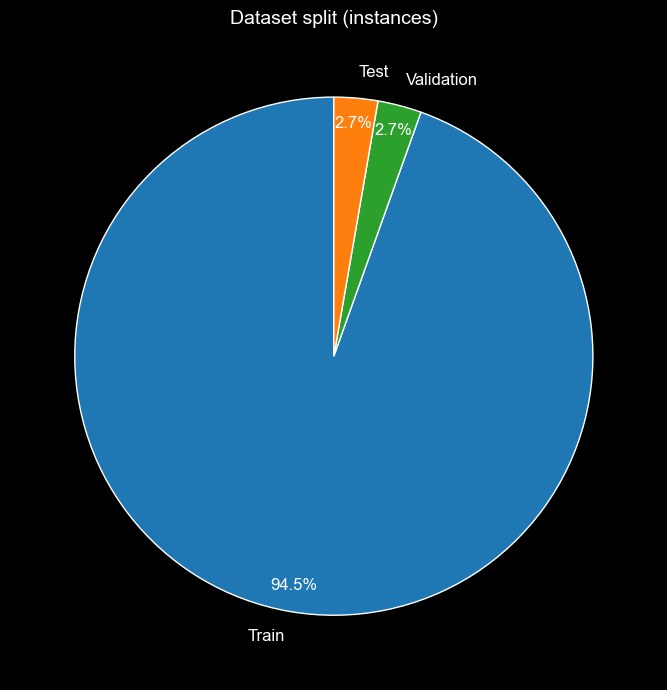

In [32]:
import matplotlib.pyplot as plt

def plot_split_pie(train_df, val_df, test_df, title="Dataset split"):
    counts = [len(train_df), len(val_df), len(test_df)]
    labels = ["Train", "Validation", "Test"]

    colors = ["#1f77b4", "#2ca02c", "#ff7f0e"]


    plt.figure(figsize=(7, 7))
    plt.pie(
        counts,
        labels=labels,
        autopct="%.1f%%",
        pctdistance=0.9,
        startangle=90,
        colors=colors,
        textprops={"fontsize": 12}
    )

    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

plot_split_pie(df_x_train, df_x_val, df_x_test)
